In [10]:
import skimage
import os
import numpy as np
import matplotlib.pyplot as plt

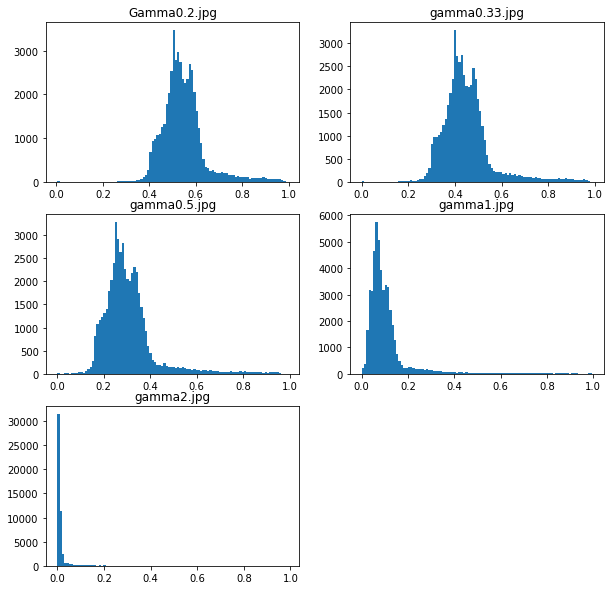

In [11]:
in_Path ='D:/placements/blinkin/bluetooth - trail/stats'
i=0
plt.figure(figsize=(10,10))
for imagePath in os.listdir(in_Path):
        i+=1
        inputPath = os.path.join(in_Path, imagePath)
        img=skimage.io.imread(inputPath,as_grey=True)
        img=skimage.transform.resize(img,(224,224))
        '''
        print(imagePath,' ',skimage.exposure.is_low_contrast(img, fraction_threshold=0.35, 
                                         lower_percentile=1,
                                         upper_percentile=99))
        '''
        plt.subplot(3,2,i)
        n=plt.hist(img.ravel(), bins = 100, cumulative = False)
        plt.title(imagePath)

### NOTE:\
image data is already normalized \
otherwise we would need to normalize into [0,1]

In [23]:
def norm_img(img):
    return img/float(255)

def rgb2lin_channel(normed_channel):
    if normed_channel<=0.04045:
        return normed_channel/12.92
    else:
        return np.power( (normed_channel+0.055)/1.055,2.4 )    

### trial on single image

In [31]:
#inputPath = os.path.join(in_Path, imagePath)
#img=skimage.io.imread(inputPath)
img=skimage.io.imread('D:/placements/blinkin/bluetooth - trail/stats/Gamma0.2.jpg')
img=skimage.transform.resize(img,(224,224))

#calculating stats of image

median_r=np.median(img[:,:,0])
median_g=np.median(img[:,:,1])
median_b=np.median(img[:,:,2])

#converting to linear

lin_r=rgb2lin_channel(median_r)
lin_g=rgb2lin_channel(median_g)
lin_b=rgb2lin_channel(median_b)

#finding brightness

Y = lin_r*0.2126 + lin_g*0.7152 + lin_b*0.0722
    
print(Y)

0.24232716099323684


### trial on image with diffrent illumation conditions

0.24232716099323684
0.15362796921677974
0.06445703654208557
0.006995410187265386
0.0003035269835488375


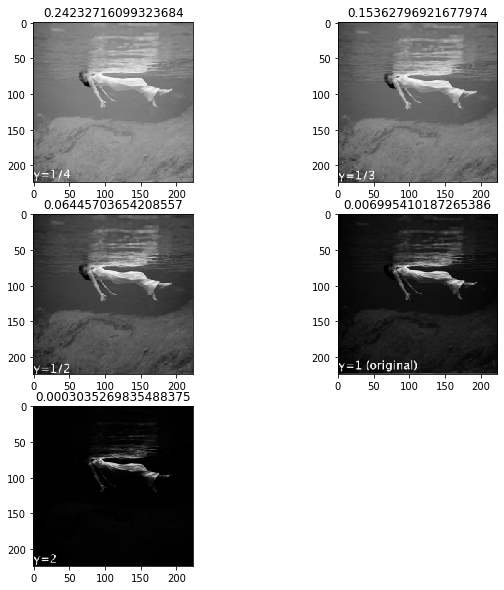

In [35]:
i=0
plt.figure(figsize=(10,10))
for imagePath in os.listdir(in_Path):
        i+=1
        inputPath = os.path.join(in_Path, imagePath)
        img=skimage.io.imread(inputPath)
        img=skimage.transform.resize(img,(224,224))
        
        median_r=np.median(img[:,:,0])
        median_g=np.median(img[:,:,1])
        median_b=np.median(img[:,:,2])

        #converting to linear

        lin_r=rgb2lin_channel(median_r)
        lin_g=rgb2lin_channel(median_g)
        lin_b=rgb2lin_channel(median_b)

        #finding brightness

        Y = lin_r*0.2126 + lin_g*0.7152 + lin_b*0.0722

        print(Y)
        
        plt.subplot(3,2,i)
        n=plt.imshow(img)
        plt.title(Y)